# Grenlandski kiti

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [124]:
csv_file_path = 'Kiti.csv'
df = pd.read_csv(csv_file_path)
df

,.2252
0,0.7194
1,0.1642
2,0.2398
3,0.1880
4,0.2123
...,...
204,0.4065
205,0.5618
206,0.4274
207,0.3279


V prvem koraku preimenujemo stolpec hitrosti, da ima ime *hitrost*.

In [125]:
df = df.rename(columns={'.2252': "hitrost"})
df

,hitrost
0,0.7194
1,0.1642
2,0.2398
3,0.1880
4,0.2123
...,...
204,0.4065
205,0.5618
206,0.4274
207,0.3279


Narišimo histogram teh hitrosti. 

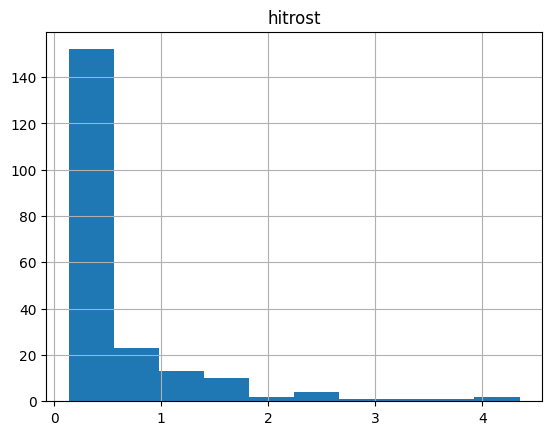

In [126]:
df.hist(bins=10)

plt.show()

## Freedman-Diaconisovo pravilo

In [127]:
širina = 2.6*(df["hitrost"].quantile(0.75) - df["hitrost"].quantile(0.25))/(len(df))**(1/3)
širina

0.14860967903045288

Tako bomo v novem hitogramu podatke namesto v deset razredov razdelili v 4.5/0.1486 = 30 razredov

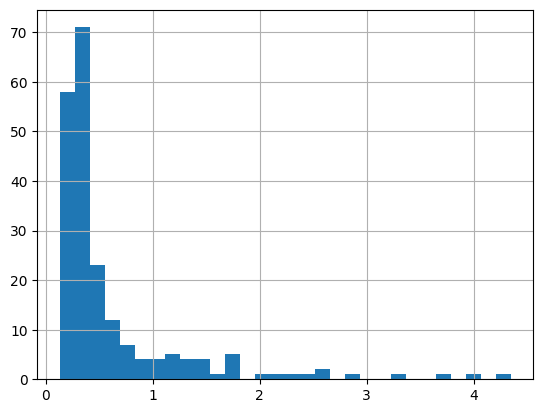

In [128]:
df["hitrost"].hist(bins=30)

plt.show()

Iz prvega histograma se zdi najbolj smiselna porazdelitev s katero bi aproksimirali eksponentna, iz drugega grafa pa vidimo, da bi res morda prišla lahko v poštev tudi kakšna druga gama porazdelitev. 

Sedaj bomo izračunali parametra gama porazdelitve, ki najbolj ustreza danim podatkom, po metodi momentov. 

In [129]:
avg = df['hitrost'].mean()
avg

0.607821052631579

In [130]:
df['kvadrat'] = df['hitrost'] ** 2
df

,hitrost,kvadrat
0,0.7194,0.517536
1,0.1642,0.026962
2,0.2398,0.057504
3,0.1880,0.035344
4,0.2123,0.045071
...,...,...
204,0.4065,0.165242
205,0.5618,0.315619
206,0.4274,0.182671
207,0.3279,0.107518


In [131]:
second_moment = df['kvadrat'].mean()
second_moment

0.8304659113875599

In [132]:
lam = avg / (second_moment - avg**2)
a = avg ** 2 / (second_moment - avg**2)

In [133]:
a

0.8013683771685957

In [134]:
lam

1.318428135549185

Sedaj narišimo gostoto slučajne spremenljivke *Gama(a, lam)* v isti koordinatni sistem z histogramom s 30 stolpci.  

In [135]:
from math import gamma, e
lam = float(lam)
a = float(a)
def f(x):
    return (lam ** a)/gamma(a) * x**(a-1)*e**(-lam*x)

f(1)

0.2871820286177199

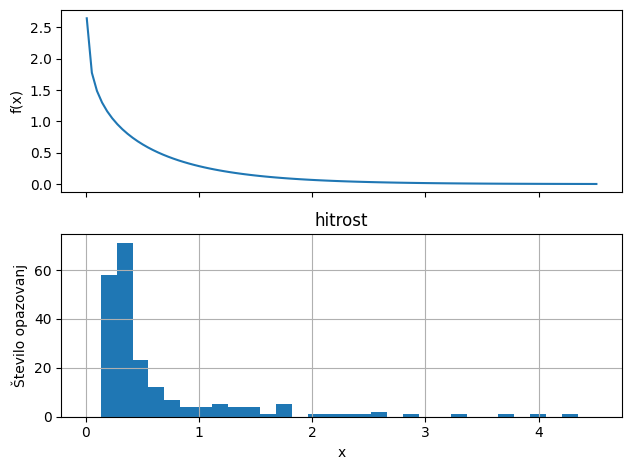

In [136]:
#Ustvarimo 100 vrednosti gostote te slučajne spremenljivke na intervalu od 0 do 4,5.
x = 0.01
x_values = [x]
values = [f(x)]
for i in range(100):
    x += 0.045
    values.append(f(x))
    x_values.append(x)

x_axis = np.array(x_values)
y_axis = np.array(values)

# Ustvarjanje grafov
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)  # Dva podgrafa, deljeni x-os

# Prvi podgraf - linijski graf
ax1.plot(x_axis, y_axis)
ax1.set_ylabel('f(x)')

# Drugi podgraf - histogram
(df['hitrost'].to_frame()).hist(bins=30, ax=ax2)
ax2.set_ylabel('Število opazovanj')

# Skupna x-označba
ax2.set_xlabel('x')

# Prikaz grafov
plt.tight_layout()  # Za boljši razmik med podgrafoma
plt.show()

In [137]:
from math import log
sum_log = log(df["hitrost"].prod())
sum_log 

-176.1499416385257

## Cenilke za $a$ in $\lambda$ po metodi največjega verjetja

Cenilki, ki sem jih za $a$ in $\lambda$ dobil po metodi največjega verjetja sta $a = 1.596$ in $\lambda = 2.626$. 

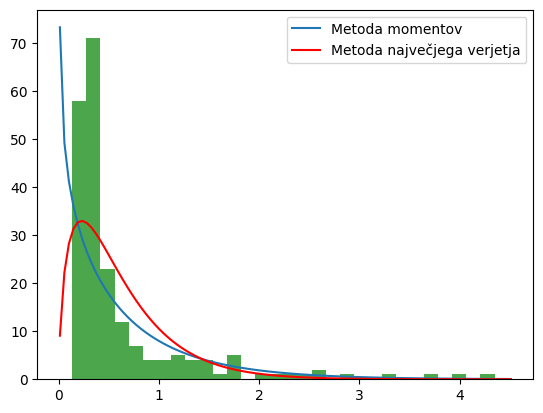

In [138]:
a1 = 1.596
l1 = 2.626
#UStvarimo gostoto gama porazdelitve za ta dva parametra. 
def g(x):
    return (l1 ** a1)/gamma(a1) * x**(a1-1)*e**(-l1*x)
#Ustvarimo 100 vrednosti gostote te slučajne spremenljivke na intervalu od 0 do 4,5.
x = 0.01
x1_values = [x]
values1 = [g(x)]
for i in range(100):
    x += 0.045
    values1.append(g(x))
    x1_values.append(x)

x1_axis = np.array(x1_values)
y1_axis = np.array(values1)

#Sedaj bomo v isti koordinatni sistem narisali grafa obeh dveh porazdelitev in histogram. 
#Pred tem moramo gostoti še ustrezno skalirati. Če narišemo histogram z 70 razredi, je ploščina histograma 11,89. Zato moramo, da dobimo 
#enake mere pomnožiti vse vrednosti v y_axis in y1_axis z 11.89
for i in range(len(y_axis)):
    y_axis[i] = y_axis[i]*27.73
    y1_axis[i] = y1_axis[i]*27.73
plt.plot(x_axis, y_axis, label="Metoda momentov")
plt.plot(x1_axis, y1_axis, c="r", label="Metoda največjega verjetja")
plt.hist(df['hitrost'], bins=30, alpha=0.7, color='green')
plt.legend()
plt.show()

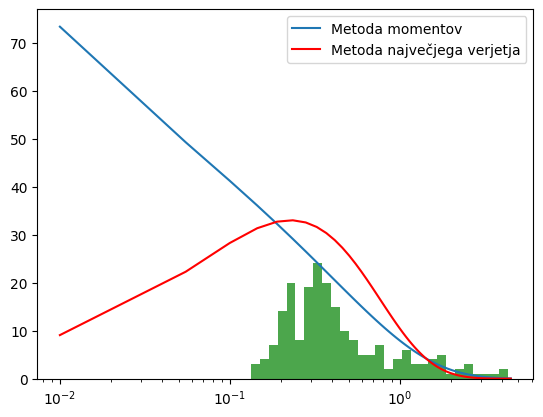

In [139]:
plt.xscale('log')
#Poskrbimo, da bodo vsi razredi enako široki.
log_bins = np.logspace(np.log10(min(df["hitrost"])), np.log10(max(df["hitrost"])), num=30)
plt.plot(x_axis, y_axis, label="Metoda momentov")
plt.plot(x1_axis, y1_axis, c="r", label="Metoda največjega verjetja")
plt.hist(df['hitrost'], bins=log_bins, alpha=0.7, color='green')
plt.legend()
plt.show()